# 1. Packages

In [1]:
# numpy - scientific computing with Python
# matplotlib - plot graphs in Python
# h5py - interact with a dataset that is stored on an H5 file

import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

%matplotlib inline

# 2. Data Loading and Preprocess

<img src="images/image2vector_kiank.png" style="width:650px; height:400px;">

y = [0], it's a 'non-cat' picture.


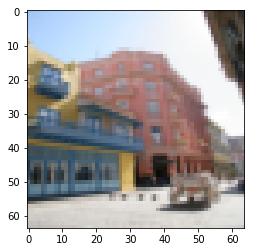

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Example of a picture
index = 23
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

In [3]:
# Print the sizes of data
print("train_set_x_orig shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_orig shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))
print("classes shape: " + str(classes.shape))

train_set_x_orig shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x_orig shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)
classes shape: (2,)


In [4]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))

train_set_x_flatten shape: (12288, 209)
test_set_x_flatten shape: (12288, 50)


In [5]:
# Standardize the dataset
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

# 3. Building the Parts (Helper Functions) of Logistic-Regression-Classifier

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

## 3.1 Sigmoid Functions

$$ f(x)=\frac{1}{1+e^{-x}} $$

In [6]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar of numpy array of any size
    
    Return:
    s -- sigmoid(z)
    """
    
    s = 1/(1 + np.exp(-z))
    
    return s

Sigmoid([0, 2]) = [0.5        0.88079708]


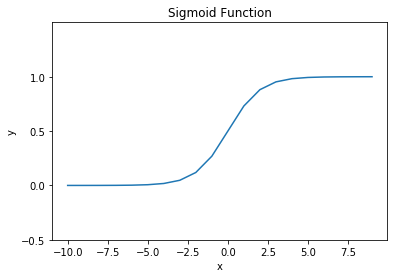

In [7]:
# Draw the sigmoid function
print("Sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

test_sigmoid_x = np.arange(-10, 10)
test_sigmoid_y = sigmoid(test_sigmoid_x)
plt.plot(test_sigmoid_x, test_sigmoid_y)
plt.xlabel('x')
# plt.xlim((-10, 10))
plt.ylabel('y')
plt.ylim((-0.5, 1.5))
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.title("Sigmoid Function")
plt.show()

## 3.2 Initializing Parameters

In [8]:
def initialize_with_zeros(dim):
    """
    This function initialize w and b to zeros.
    
    Argument:
    dim -- size of vector w
    
    Return:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar
    """
    
    w = np.zeros((dim, 1))
    b = 0
    
    return w, b

In [9]:
w, b = initialize_with_zeros(3)
print("w = " + str(w))
print("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0


## 3.3 Forward and Backward Propagation

**Forward propagation:**
<font color='red'>
$$ 
Z = W^{T}X+b \\
\hat{y} = A = sigmoid(Z)
$$
<font color='black'>

**Backward Propagation:**
$$ 
L(Y, A) = -\frac{1}{m}[YlogA + (1-Y)logA] \\
\frac{dL}{dW} = \frac{dL}{dA}\frac{dA}{dZ}\frac{dZ}{dW} \\
\frac{dL}{db} = \frac{dL}{dA}\frac{dA}{dZ}\frac{dZ}{db} \\
\Downarrow 
$$
<font color='red'>
$$ 
\frac{dL}{dZ} = \frac{1}{m}(A - Y) \\
\frac{dL}{dW} = \frac{1}{m}X(\frac{dL}{dZ})^{T} \\
\frac{dL}{db} = \frac{1}{m}\sum\frac{dL}{dZ} = np.mean(dZ) 
$$

In [10]:
def propagate(w, b, X, Y):
    """
    This function calculates a forward propagation to get the number of cost.
    Then does a backward propagation to find the derivatives of w and b.
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- input data of size (num_px * num_px * 3, number of examples)
    Y -- labels of input data (0 if non-cat, 1 if cat) of size (1, number of examples)
    
    Return:
    cost -- cost of logistic regression using -yloga-(1-y)log(1-a)
    """
    
    # number of examples
    m = X.shape[1]
    
    # FORWARD PROPAGATION
    A = sigmoid(np.dot(w.T, X) + b)
    cost1 = np.dot(Y, np.log(A).T)
    cost2 = np.dot(1 - Y, np.log(1 - A).T)
    cost = - 1/m * (cost1 + cost2)
    cost = np.squeeze(cost)
    # cost = np.asscalar(cost)
    
    # BACKWARD PROPAGATION
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    # Make a dictionary of dw and db to grads
    grads = {
        "dw": dw,
        "db": db
    }
    
    return grads, cost

In [11]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


## 3.4 Optimization

$$
W = W - \eta\frac{dL}{dW} \\
b = b - \eta\frac{dL}{db}
$$

In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function calculates the optimized w and b, and calculated the cost.
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- input data of size (num_px * num_px * 3, number of examples)
    Y -- labels of input data (0 if non-cat, 1 if cat) of size (1, number of examples)
    num_iterations -- number of iterations, integer
    learning_rate -- learning rate, float
    print_cost -- bool value (0 if not print, 1 if print cost)
    
    Return:
    params -- dictionary storing parameters of weights and bias
    grads -- dictionary storing dw and db
    costs -- an array of the costs, every 100 iterations
    """
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iterations %i: %f" % (i, cost)) # 这里%表示占位符
            
    params = {
        "w": w,
        "b": b
    }
    
    grads = {
        "dw": dw,
        "db": db
    }
    
    return params, grads, costs

In [13]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


## 3.5 Prediction

In [14]:
def predict(w, b, X):
    """
    This function makes a prediction of the test data.
    
    Arguments:
    w -- weights, a numpy array of size(dim_px * dim_px * 3, 1)
    b -- bias, a scalar
    X -- test data of size (dim_px * dim_px * 3, number of examples)
    
    Return:
    Y_prediction -- a numpy array of size (1, number of examples), storing the results of predictions
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Activation function
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Predict the results using activated values
    for i in range(m):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
    
    return Y_prediction

In [15]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


# 4. Merge All Functons into a Model

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    This function merges all the funcions above to a model.
    
    Arguments:
    X_train -- training data, numpy array of size (dim_px * dim_px * 3, number of training set examples)
    Y_train -- training output labels, numpy array of size (1, number of training set examples)
    X_test -- test data, numpy array of size (dim_px * dim_px * 3, number of test set examples)
    Y_test -- test output labels, numpy array of size (1, number of test set examples)
    num_iterations -- number of iterations, integer
    learning_rate -- learning rate, float
    print_cost -- bool value (0 if not print cost, 1 if print cost)
    
    Return:
    d -- dictionary of all informaions
    """
    
    # Initialize
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descnet
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters from dictionary params
    w = params["w"]
    b = params["b"]
    
    # Predict train and test set examples
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    # Print train/test errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train - Y_prediction_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_test - Y_prediction_test)) * 100))
    
    # Dictionary of all informations
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return d

In [17]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iterations 0: 0.693147
Cost after iterations 100: 0.584508
Cost after iterations 200: 0.466949
Cost after iterations 300: 0.376007
Cost after iterations 400: 0.331463
Cost after iterations 500: 0.303273
Cost after iterations 600: 0.279880
Cost after iterations 700: 0.260042
Cost after iterations 800: 0.242941
Cost after iterations 900: 0.228004
Cost after iterations 1000: 0.214820
Cost after iterations 1100: 0.203078
Cost after iterations 1200: 0.192544
Cost after iterations 1300: 0.183033
Cost after iterations 1400: 0.174399
Cost after iterations 1500: 0.166521
Cost after iterations 1600: 0.159305
Cost after iterations 1700: 0.152667
Cost after iterations 1800: 0.146542
Cost after iterations 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


# 5. Postprocess

## 5.1 Plot Learning Curve

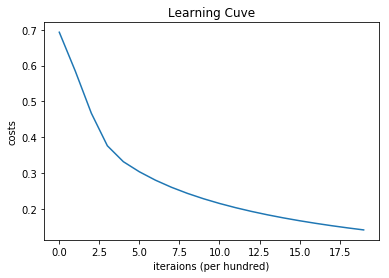

In [18]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.xlabel("iteraions (per hundred)")
plt.ylabel("costs")
plt.title("Learning Cuve")
plt.show()

## 5.2 Test with additional photos